In [0]:
import numpy as np
import sys
import pandas as pd

In [0]:
def fit_ridge_regression(X, Y, l):
    """
    Calculates and returns analityc solution for ridge regression.

    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param l: regularization parameter lambda
    :return: value of beta (1 dimensional np.array)
    """
    
    # TODO: Implement fit_ridge_regression (same as previous homeworks)
    
    #beta = np.zeros(X.shape[1])
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)-l),X.T),Y)
    return beta


In [0]:
def cost_function(X, Y, beta):
  
  m = Y.shape[0]
  #J = np.sum((X.dot(beta)-Y)**2)/2/m
  J = np.sqrt(np.sum((X.dot(beta)-Y)**2)/m)
  return J



In [0]:

def gradient_descent(X, Y, l, epsilon, step_size, max_steps):
    """
    Implement gradient descent using the value of the gradient
    divided by number of samples.

    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param l: regularization parameter lambda
    :param epsilon: approximation strength
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    """
    beta = np.zeros(X.shape[1])
    previous_beta= np.zeros(X.shape[1])
    #print X.shape[1]
    for s in range(max_steps):
        # TODO: Implement iterations.
        # Use normalized_gradient to calculate the gradient
        #beta = beta-step_size*np.dot((np.dot(X,beta.T)-Y),X)+l*beta
        m = Y.shape[0]
        #print('size',m)
        hypothesis = X.dot(beta)
        #print('hypothesis', hypothesis.head())
        loss = hypothesis-Y
        #print('loss', loss.head())
        gradient = X.T.dot(loss)/m
        #print('gradient', gradient.head())
        beta = beta-step_size*gradient-l*beta
        #print('beta',beta)
        #print(max(beta -previous_beta) )
        #if max(abs(beta -previous_beta)) <epsilon:
        if (abs(np.dot(beta,beta.T) -np.dot(previous_beta,previous_beta.T))) <epsilon:
          print('less then epsilon')
          break
        else:  previous_beta= beta
    return beta

In [0]:
def ridge_loss_gradient(X, Y, beta, l):
    """
    This function calculates the gradient for ridge regression for
    parameter values beta.

    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :param l: regularization parameter lambda
    :return: normalized gradient, i.e. gradient normalized according to data
    """
    # TODO: Implement
    return np.zeros(X.shape[1])

In [0]:

def loss(X, Y, beta):
    """
    Calculate sum of error squares divided by number of points.

    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: 1/N * SUM (y - x beta)^2
    """
    print(X.shape[0])
    #print(np.dot(X,beta.T))
    #print((Y - np.dot(X,beta.T)))
    #print((Y - np.dot(X,beta.T))**2)
    #print(np.sum((Y - np.dot(X,beta.T))**2))
    return  (1.0/X.shape[0]) * np.sum((Y - np.dot(X,beta.T))**2)
   

In [0]:
def d_dimensional_comparison(d, beta_star, num_points, sigma, l=1):
    # Generate data, no need to touch this code.
    beta_star = np.array(beta_star)
    X_list = [np.random.uniform(-1, 1, num_points) for _ in range(d)]
    X = np.column_stack(X_list)
    X = np.column_stack((np.ones(num_points), X))
    Y = np.random.normal(X.dot(beta_star), sigma)
   

    # Calculate analytic and gradient descent beta hats.
    beta_hat_analytic = fit_ridge_regression(X, Y, l=l)
    beta_hat_grad = gradient_descent(X, Y, l=l, epsilon=1e-8, step_size=1e-2,
                                     max_steps=10000)

    # Testing code for your esimates.
    if np.linalg.norm(beta_star - beta_hat_analytic) > 1.:
        print('Your analytical betas is too far apart from beta star')
        print('Analytical: ', beta_hat_analytic)
        print('Beta star: ', beta_star)
        

    if np.linalg.norm(beta_hat_grad - beta_hat_analytic) > 1e-4:
        print('Your gradient descent beta is too far apart from analytical '
              'solution')
        print('Beta gradient: ', beta_hat_grad)
        print('Analytical: ', beta_hat_analytic)
        

    l_a = loss(X, Y, beta_hat_analytic)
    l_gd = loss(X, Y, beta_hat_grad)
    if abs((l_a - l_gd) / l_a) > 1e-8:
        print('Your gradient and analytical losses are too far apart')
        print('analytical loss:', l_a)
        print('gradient loss:', l_gd)
        

    print('Passed')

In [9]:

if __name__ == '__main__':
    # Fist test the signature of your gradient descent function.
    #beta_est = gradient_descent(np.array([[1, 2], [1, 3], [1, 4], [1, 5]]),
    #                            np.array([2, 3, 4, 5.01]),
    #                            l=0,
    #                            epsilon=1e-4,
    #                            step_size=1e-3,
    #                            max_steps=2)
    beta_est = gradient_descent(np.array([[1, 2], [1, 3], [1, 4], [1, 5]]),
                                np.array([2, 3, 4, 5.01]),
                                l=.1,
                                epsilon=1e-8,
                                step_size=1e-3,
                                max_steps=10000)
    
    assert beta_est.shape == (2,)
    # Call comparison function with the given 5-dimensional beta (b0, ..., b5)
    beta5d = [1.5, 2.2, 3.5, 4.4, 1.1, 3.9]
    d_dimensional_comparison(5, beta5d, 200, 2, l=1)


200
200
Passed


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


In [0]:
from google.colab import auth
auth.authenticate_user()

file_id = '11IxUEDdn3UgTl-5uxi-siJ5GS3b1U2h4'#created.get('id')

import io
from googleapiclient.http import MediaIoBaseDownload

from googleapiclient.discovery import build
drive_service = build('drive', 'v3') #4/-ztrYCQVSdiJRl0lnh12uWvCg02WHyNOUnJ90ex7BNE verification code




In [11]:
request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()
  
downloaded.seek(0)

0L

In [0]:
df = pd.read_csv(downloaded)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 14 columns):
Unnamed: 0        6234 non-null int64
price             6234 non-null float64
condition         6234 non-null object
district          6234 non-null object
max_floor         6234 non-null int64
street            6234 non-null object
num_rooms         6234 non-null int64
region            6234 non-null object
area              6234 non-null float64
url               6234 non-null object
num_bathrooms     6234 non-null int64
building_type     6234 non-null object
floor             6234 non-null int64
ceiling_height    6234 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 681.9+ KB


In [14]:
df.head()

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,0,65000.0,good,Center,9,Vardanants St,3,Yerevan,80.0,http://www.myrealty.am/en/item/24032/3-senyaka...,1,panel,4,2.8
1,1,140000.0,newly repaired,Arabkir,10,Hr.Kochar St,4,Yerevan,115.0,http://www.myrealty.am/en/item/17599/4-senyaka...,1,monolit,2,3.0
2,2,97000.0,newly repaired,Center,10,Teryan St,2,Yerevan,72.0,http://www.myrealty.am/en/item/29472/2-senyaka...,1,panel,3,2.8
3,3,47000.0,good,Center,9,D. Demirchyan St,1,Yerevan,43.0,http://www.myrealty.am/en/item/37186/1-senyaka...,1,panel,9,2.8
4,4,51000.0,newly repaired,Center,14,Sayat Nova Ave,1,Yerevan,33.0,http://www.myrealty.am/en/item/37184/1-senyaka...,1,other,4,2.8


In [0]:
#i = np.random.randint(0,N,np.int(N*.8))


In [0]:
# 1. categorical poxel tvayini 2. ambohji hamar gradient descent ashxatacnel u stanal Beta vori depqum lossy <30000 #df.iloc[25088]

dfX = pd.get_dummies(df.drop('url',axis=1).drop('street',axis=1).drop('Unnamed: 0',axis=1).drop('price',axis=1).drop('region',axis=1)).copy()
dfY = (df['price'])



In [84]:
dfX.head()

,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height,condition_good,condition_newly repaired,condition_zero condition,district_Achapnyak,...,district_Nor Norq,district_Norq Marash,district_Nubarashen,district_Qanaqer-Zeytun,district_Shengavit,district_Vahagni district,building_type_monolit,building_type_other,building_type_panel,building_type_stone
0,9,3,80.0,1,4,2.8,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,10,4,115.0,1,2,3.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,10,2,72.0,1,3,2.8,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,1,43.0,1,9,2.8,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,1,33.0,1,4,2.8,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
dfY.head()

0     65000.0
1    140000.0
2     97000.0
3     47000.0
4     51000.0
Name: price, dtype: float64

In [0]:
ones= pd.DataFrame(data = np.ones(dfX.index.size))
#ones.info


In [86]:
dfX = pd.concat([ones,dfX],  axis = 1)
dfX.head()

,0,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height,condition_good,condition_newly repaired,condition_zero condition,...,district_Nor Norq,district_Norq Marash,district_Nubarashen,district_Qanaqer-Zeytun,district_Shengavit,district_Vahagni district,building_type_monolit,building_type_other,building_type_panel,building_type_stone
0,1.0,9,3,80.0,1,4,2.8,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,10,4,115.0,1,2,3.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,10,2,72.0,1,3,2.8,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,9,1,43.0,1,9,2.8,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,14,1,33.0,1,4,2.8,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
cost_function(dfX, dfY, np.zeros(dfX.shape[1]))

100745.48906537611

In [204]:
 #beta_hat_grad = gradient_descent(dfX, dfY, l=.0001, epsilon=1e-3, step_size=2.7e-8, max_steps=500)
beta_hat_grad = gradient_descent(dfX, dfY, l=0, epsilon=1e-7, step_size=27e-5, max_steps=150000)
print('gradient loss:', (l_gd))
loss(dfX, dfY, beta_hat_grad)

('gradient loss:', 29716.974568725276)
6234


890514637.95046461

In [183]:
beta_hat_grad 

0                            -2085.730273
max_floor                     -214.196483
num_rooms                    -8053.307968
area                          1319.253917
num_bathrooms                 5392.125434
floor                          -73.055137
ceiling_height               -2545.113892
condition_good               -6326.573431
condition_newly repaired      6257.717692
condition_zero condition     -2016.874533
district_Achapnyak           -2534.785257
district_Arabkir             -1515.190472
district_Avan                -2876.874279
district_Center              17985.527291
district_Davtashen           -2030.265386
district_Erebuni             -1013.176989
district_Malatia-Sebastia    -3279.179530
district_Nor Norq            -2901.374385
district_Norq Marash            36.648451
district_Nubarashen            -15.314523
district_Qanaqer-Zeytun      -1721.412903
district_Shengavit           -2213.706070
district_Vahagni district       -6.626220
building_type_monolit         7141

In [186]:
l_gd=cost_function(dfX, dfY, beta_hat_grad)#loss(dfX, dfY, beta_hat_grad)
print('gradient loss:', (l_gd))
loss(dfX, dfY, beta_hat_grad)

('gradient loss:', 34511.379532039944)
6234


1191035317.2045054

In [176]:
print((dfY-np.dot(dfX,beta_hat_grad)))

0      -20595.395308
1       10237.590689
2        1004.585318
3       -5993.986248
4      -18107.062259
5      -29923.641482
6        5999.067271
7       28685.049836
8       -4692.103913
9      -23922.853844
10      -1605.911139
11      14690.160312
12      18690.575792
13       3256.362415
14      35366.474180
15      -7500.383566
16     -61490.105137
17      36057.524727
18      -6820.123433
19      -5378.108030
20     -21590.001808
21       8225.533068
22      12958.410739
23      23106.131529
24      41552.301593
25      -5493.909357
26      55423.806864
27     -10323.737885
28     -15547.206183
29       1306.556060
            ...     
6204     3789.689019
6205     8872.979435
6206     2157.151317
6207    -2383.976575
6208     6910.261768
6209   -51598.961639
6210    -9764.387447
6211    12181.458451
6212      359.610917
6213    -1303.183422
6214    -6204.761839
6215    -4147.102001
6216    14373.431715
6217     4546.568588
6218   -12908.005878
6219   -13841.403262
6220   -10500

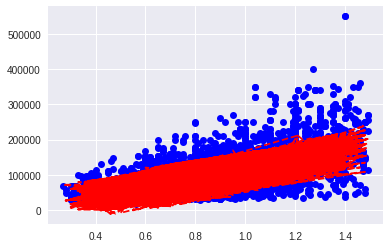

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(dfX['area'], 100000*(dfY), 'bo')
#plt.plot(dfX['area'], np.dot(beta_hat_grad.T,dfX.T), 'r--')
plt.plot(dfX['area'], 100000*(np.dot(dfX,beta_hat_grad)), 'r--')